# Real Data

In [ ]:
import sys
import os
import pickle
from tqdm import tqdm
from topolearn import *
import warnings
from sklearn.model_selection import train_test_split
import scipy.io
import numpy as np
warnings.filterwarnings("ignore")

J=2
P=3

seed = 0
mat = scipy.io.loadmat('C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\real_data\\data_real.mat')
edge_signals = np.array(mat["signal_edge"].T, dtype=float)
valid_signal = np.where(np.sum(edge_signals, axis=1)!=0)
edge_signals = edge_signals[valid_signal]
Y_train, Y_test = train_test_split(edge_signals, test_size=0.2, random_state=seed)
Y_train = Y_train.T
Y_test = Y_test.T
Lu = mat["B2"] @ mat["B2"].T
Ld = mat["B1"].T @ mat["B1"]
L=Lu+Ld
Lu = np.array(Lu, dtype=float)
Ld = np.array(Ld, dtype=float)
L = np.array(L, dtype=float)


with open("C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\synthetic_data\\random_sparsity25\\full_data_separated.pkl", "rb") as file:
    data = pickle.load(file)
c = data["c_true"].max()
epsilon = data["epsilon_true"].mean()

K0_coll = np.arange(5, 26, 4)

init_params = {
    "J": J,
    "P": P,
    "true_prob_T": 1.,
    "n": mat["B1"].shape[0],
    "sparsity": 25,
    "model.B1": mat["B1"],
    "B2_true": mat["B2"]
}

algo_params = {
    "lambda_": 1e-2,
    "lambda2": 0.3,
    "mu": 10,
    "tol": 1e-7,
    "patience": 20,
    "max_iter": 800,
    "QP": True,
    "mode": "optimistic",
    "warmup": 2,
    "on_test": False,
    "complete": True,
    "verbose": True,
}

min_error_cfou_train = np.zeros((len(K0_coll)))
min_error_cfou_test = np.zeros((len(K0_coll)))
min_error_fou_train = np.zeros((len(K0_coll)))
min_error_fou_test = np.zeros((len(K0_coll)))
min_error_slep_train = np.zeros((len(K0_coll)))
min_error_slep_test = np.zeros((len(K0_coll)))
min_error_wave_train = np.zeros((len(K0_coll)))
min_error_wave_test = np.zeros((len(K0_coll)))
min_error_sep_train = np.zeros((len(K0_coll)))
min_error_sep_test = np.zeros((len(K0_coll)))
min_error_complete_train = np.zeros((len(K0_coll)))
min_error_complete_test = np.zeros((len(K0_coll)))
min_error_pess_train = np.zeros((len(K0_coll)))
min_error_pess_test = np.zeros((len(K0_coll)))
approx_cfou = np.zeros((len(K0_coll)))
approx_fou = np.zeros((len(K0_coll)))
approx_sep = np.zeros((len(K0_coll)))
approx_slep = np.zeros((len(K0_coll)))
approx_wave = np.zeros((len(K0_coll)))
approx_comp = np.zeros((len(K0_coll)))
approx_pess = np.zeros((len(K0_coll)))

dict_errors = {
    "classic_fourier": (min_error_cfou_train, min_error_cfou_test, approx_cfou),
    "fourier": (min_error_fou_train, min_error_fou_test, approx_fou),
    "slepians": (min_error_slep_train, min_error_slep_test, approx_slep),
    "wavelet": (min_error_wave_train, min_error_wave_test, approx_wave),
    "separated": (min_error_sep_train, min_error_sep_test, approx_sep),
    "complete": (min_error_complete_train, min_error_complete_test, approx_comp),
    "complete_soft": (min_error_pess_train, min_error_pess_test, approx_pess)
}

dict_errors2 = {
    "classic_fourier": min_error_cfou_test,
    "fourier": min_error_fou_test,
    "slepians": min_error_slep_test,
    "wavelet": min_error_wave_test,
    "separated": min_error_sep_test,
    "complete": min_error_complete_test,
    "complete_soft": min_error_pess_test,
}

dict_types = {
    # "classic_fourier": ("Fourier", "classic_fourier"),
    # "fourier": ("Topological Fourier", "fourier"),
    # "slepians": ("Topological Slepians", "slepians"),
    # "wavelet": ("Hodgelet", "wavelet"),
    # "separated": ("Separated Hodge Laplacian", "separated"),
    # "complete": ("Separated Hodge Laplacian with Topology learning","separated"),
    "complete_soft": ("Separated Hodge Laplacian with Soft Topology learning","separated"),
}

models = {}

for k0_index, k0 in tqdm(enumerate(K0_coll), leave=False):

    for d in dict_types.items():

        model = TopoSolver(
            X_train=None,
            X_test=None,
            Y_train=Y_train,
            Y_test=Y_test,
            c=c,
            epsilon=epsilon,
            K0=k0,
            dictionary_type=d[1][1],
            **init_params,
        )

        learn_topology = True if "complete" in d[0] else False
        if "pess" in d[0]:
            algo_params["mode"]="pessimistic"
        else:
            algo_params["mode"]="optimistic"

        (
            dict_errors[d[0]][0][k0_index],
            dict_errors[d[0]][1][k0_index],
            dict_errors[d[0]][2][k0_index],
        ) = model.fit(
            Lu_true=Lu,
            init_mode="only_X",
            learn_topology=learn_topology,
            **algo_params,
        )
        dict_errors2[d[0]] = dict_errors[d[0]][1]
        models[f"{k0_index},{d[0]}"] = model

        print(
            f"Sparsity: {k0} Testing {d[1][0]}... Done! Test Error: {dict_errors[d[0]][1][k0_index]:.6f}"
        )

0it [00:00, ?it/s]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.793609156546975 False 0.06120932972453626
[0.99999996 1.         0.99999991 1.         1.         0.99999995
 1.         0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999993
 0.99999998 1.         1.         1.         1.         1.
 1.         1.         0.99999999 1.         1.         1.
 1.         1.         0.99999998]
2 11.834599844344044 True 0.10138722770016916
[1.         1.         0.99249608 1.         1.         0.99699093
 1.         0.99557525 0.99980688 1.         1.         0.99973721
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99939565 0.99806318
 0.9957872  1.         1.         0.9943631  1.         0.99958663
 1.         1.         0.99963296 1.         1.        

1it [00:27, 27.11s/it]

Sparsity: 5 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.069269
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.959460212148942 False 0.22651472854070298
[0.92046199 0.98921177 1.         1.         0.6828254  0.99219094
 1.         1.         0.99909618 1.         1.         1.
 1.         1.         1.         0.84094689 1.         0.99502458
 1.         1.         0.99232281 0.99853681 0.81616588 1.
 0.99777643 0.9938176  1.         1.         1.         0.98588365
 1.         0.69397978 0.97987286 0.97060954 0.79550248 0.99988753
 1.         0.999151   0.99964016]
2 11.505994974636675 True 0.17335034252396353
[1.         0.97258285 1.         0.9664589  0.73220511 0.97916841
 1.         1.         0.99721352 1.         1.         0.99094825
 1.         1.         1.         0.77330836 1.         0.9962507
 1.         0.95016797 0.98616396 0.99805149 0.80385737 1.
 0.

2it [00:35, 15.94s/it]

Sparsity: 9 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.009858
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.75298708779357 False 0.020526912938844347
[0.94537381 0.99998707 0.95758322 0.9078287  0.95213489 1.
 1.         0.98542044 0.99897665 0.99945717 1.         0.99953681
 1.         1.         1.         0.99748355 0.99635064 0.9983557
 0.99979737 0.99203882 0.99642801 0.99967606 0.99080254 0.98736017
 0.99999566 0.99718326 0.99994393 0.96264756 0.99988019 0.99859245
 0.99080621 0.96437954 0.99430963 0.99378296 0.9957781  0.9972698
 1.         0.99922794 0.98548114]
2 11.620104699698752 True 0.011267032561314054
[0.94568491 0.99998707 0.94392512 0.89294603 0.95034407 0.99834037
 1.         0.98092352 0.99864176 0.99923316 1.         0.99890906
 1.         1.         0.99999665 0.99616962 0.99534417 0.9985442
 0.99975793 0.98535905 0.99544042 0.99960513 0.98887494

3it [02:01, 48.01s/it]

Sparsity: 13 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.002755
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.740998823354367 False 0.00859329331877389
[0.99705494 0.99996183 0.97892566 0.97389685 0.98614578 1.
 1.         0.99049189 0.9989772  0.99957225 1.         0.99944227
 0.9999804  0.99999647 0.99999367 0.99531992 0.9971324  1.
 0.99970301 0.98795559 0.99986485 0.9999088  0.99889546 0.98042171
 1.         0.99967728 0.99993228 0.97418492 0.99966461 0.99876975
 0.99384741 0.98519677 0.99836184 0.98649806 0.97183477 0.9983622
 0.99796857 0.99877987 0.99214396]
2 11.672280893337767 True 0.005842531010054567
[0.99618743 1.         0.97583747 0.95413691 0.9713671  1.
 1.         0.98616166 0.99804665 0.9991763  1.         0.99934424
 0.99997108 0.99999647 1.         0.9942578  0.99622384 1.
 0.99963033 0.97882766 0.9979083  0.99997347 0.99852647 0.97099979
 1.      

4it [02:38, 43.75s/it]

Sparsity: 17 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.001158
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.742054469853493 False 0.0023624752144764333
[0.99767234 0.99955788 0.99552971 0.99884284 0.99848221 1.
 1.         0.99953199 0.99985445 0.99974835 0.99998984 0.99998476
 0.99999265 1.         0.99996391 0.9987392  0.99775248 0.99861835
 0.99980837 0.99782062 0.99949715 0.99989864 0.99936647 0.99858807
 0.9983613  0.99989019 0.9999476  0.99818134 0.99995459 0.99966533
 0.9955881  1.         0.99980655 0.99901161 0.99847901 0.99955396
 0.99741435 0.99965985 0.99430014]
2 11.729985367830606 True 0.002576457561152245
[0.99503622 0.9993098  0.99082475 0.99395977 0.99657199 1.
 1.         0.99960557 0.99976744 0.99957548 0.99999495 0.99990423
 0.99998839 0.99998741 0.99993669 0.99751293 0.99560428 0.99741182
 0.99965097 0.99655866 0.99983301 0.99971521 0.99838572 0

5it [03:24, 44.44s/it]

Sparsity: 21 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.000761
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.758384222278147 False 0.015817543480989592
[0.94086428 1.         1.         0.98315738 0.99832715 1.
 0.99999427 0.99704334 0.99630673 1.         1.         0.99897136
 0.99975896 1.         1.         0.98260352 1.         0.99802463
 0.99968285 1.         0.99970543 0.99903237 0.99898496 0.99254647
 0.99907358 0.99764817 0.99939909 0.99436918 0.99998511 0.99928263
 1.         0.98210959 0.99090497 1.         0.98836217 0.9981377
 0.99895636 0.99487336 0.99710214]
2 11.704092631146043 True 0.015169747721975322
[1.         1.         1.         0.96385528 1.         1.
 0.9999956  0.99562631 0.99515407 1.         1.         0.99349272
 0.99923984 1.         1.         0.96996585 1.         0.99747815
 0.99975164 1.         0.99852767 0.99907399 0.9950756  0.9

Sparsity: 25 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.000537


In [ ]:
# import pickle
# with open(f"C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\results\\real\\real_J{J}P{P}.pkl", "rb") as file:
#     models3 = pickle.load(file)
#     dict_errors3 = pickle.load(file)

# dict_errors3["complete_soft"] = dict_errors2["complete_soft"]
# models3 = [models3, models]

# with open(f"C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\results\\real\\real_J{J}P{P}.pkl", "wb") as file:
#     pickle.dump(models3, file)
#     pickle.dump(dict_errors3, file)

In [11]:
import scipy.io
import numpy as np

J=2
P=3
K0_coll = np.arange(5, 26, 4)   
seed = 0
mat = scipy.io.loadmat('C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\real_data\\data_real.mat')
Lu = mat["B2"] @ mat["B2"].T
Ld = mat["B1"].T @ mat["B1"]
L=Lu+Ld
Lu = np.array(Lu, dtype=float)
Ld = np.array(Ld, dtype=float)
L = np.array(L, dtype=float)

0 [(43, 3), (3, 20), (20, 43)]
0 [(32, 3), (3, 31), (31, 32)]
0 [(21, 5), (5, 22), (22, 21)]
0 [(8, 11), (11, 13), (13, 8)]
0 [(9, 23), (23, 33), (33, 9)]
0 [(16, 18), (18, 19), (19, 16)]
0 [(25, 18), (18, 19), (19, 25)]
0 [(24, 23), (23, 33), (33, 24)]
0 [(24, 23), (23, 42), (42, 24)]
0 [(27, 21), (21, 43), (43, 27)]
0 [(40, 34), (34, 41), (41, 40)]
0 [(48, 36), (36, 38), (38, 48)]
0 [(41, 34), (34, 37), (37, 41)]
0 [(0, 29), (29, 28), (28, 46), (46, 0)]
0 [(1, 34), (34, 37), (37, 49), (49, 1)]
0 [(49, 1), (1, 47), (47, 45), (45, 49)]
0 [(8, 2), (2, 31), (31, 11), (11, 8)]
0 [(35, 4), (4, 22), (22, 39), (39, 35)]
0 [(10, 35), (35, 4), (4, 44), (44, 10)]
0 [(32, 5), (5, 21), (21, 43), (43, 32)]
0 [(16, 9), (9, 23), (23, 28), (28, 16)]
0 [(25, 13), (13, 49), (49, 18), (18, 25)]
0 [(16, 19), (19, 44), (44, 28), (28, 16)]
0 [(42, 23), (23, 28), (28, 46), (46, 42)]
0 [(25, 10), (10, 44), (44, 19), (19, 25)]
0 [(0, 29), (29, 12), (12, 14), (14, 48), (48, 0)]
0 [(49, 13), (13, 31), (31, 2), 

C:\Users\engri\AppData\Local\Temp\ipykernel_24680\2990203563.py:114: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  my_plt = sns.lineplot(
C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
c:\Users\engri\anaconda3\lib\site-packages\matplotlib\transforms.py:766: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  points = np.asarray(points, float)
C:\Users\engri\AppData\Local\Temp\ipykernel_24680\2990203563.py:192: FutureWarning: Calling float on a single element Series is deprecated and wil

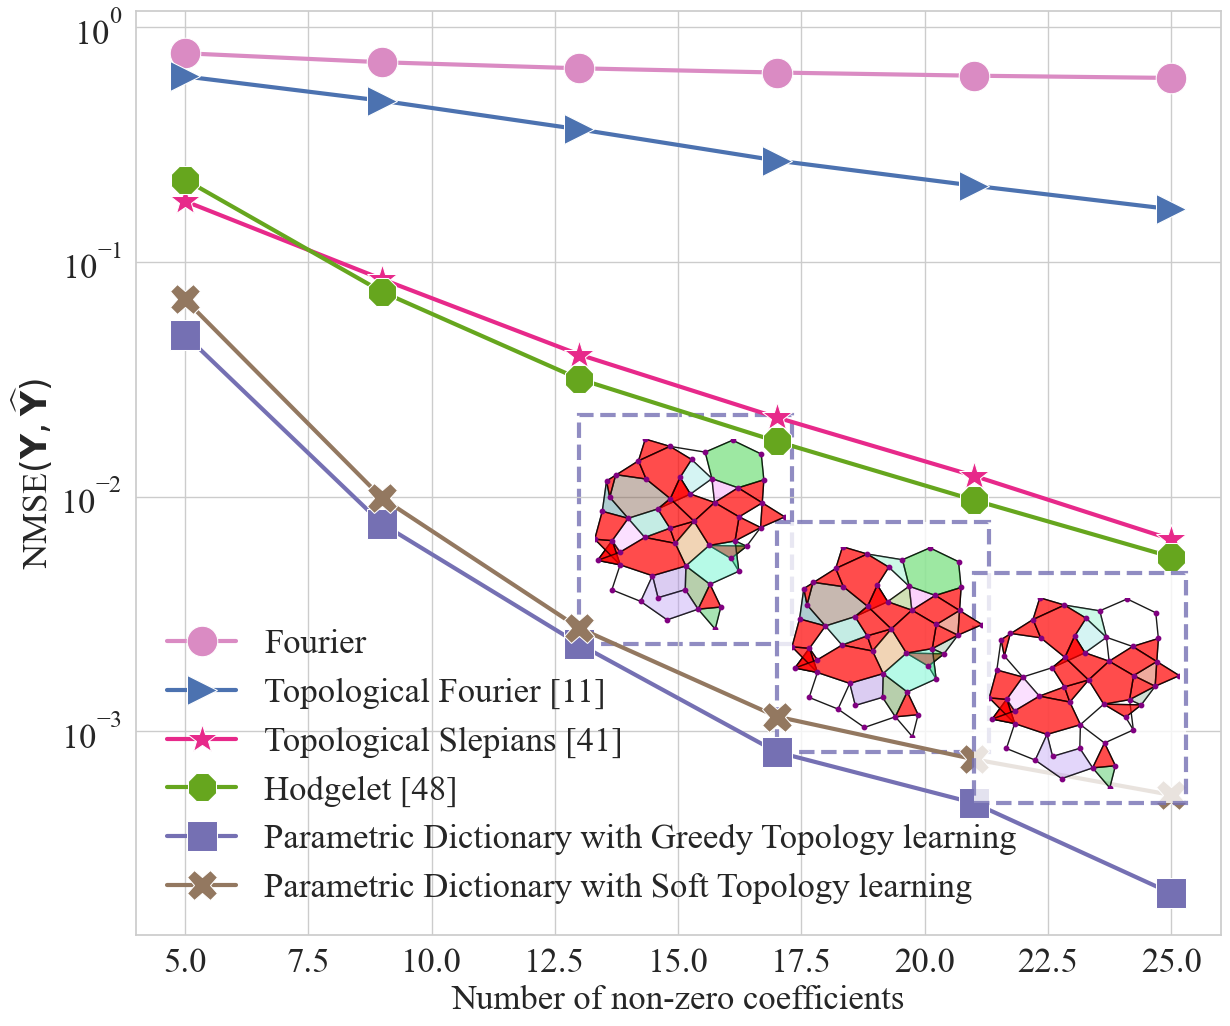

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from networkx.algorithms.cycles import find_cycle
from matplotlib.patches import Polygon
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

import pickle
with open(f"C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\results\\real\\real_J{J}P{P}.pkl", "rb") as file:
    models3 = pickle.load(file)
    dict_errors3 = pickle.load(file)

coll2 = [2,3,4]
models_poly = defaultdict(list)
for idx, i in enumerate(coll2):
    model = models3[0][f'{i},complete']
    A = np.zeros((model.B1.shape[0], model.B1.shape[0]))

    for edge_index in range(model.B1.shape[1]):
        nodes = np.where(model.B1[:, edge_index] != 0)[0]
        A[nodes[0], nodes[1]] = 1

    G = nx.from_numpy_array(A)

    num_polygons = 0
    B2 = model.B2

    pos = nx.kamada_kawai_layout(G)
    
    for polygon_index in range(B2.shape[1]):
        np.random.seed(polygon_index)
        color = np.random.rand(3)
        polygon_edges = []
        edges = np.where(B2[:, polygon_index] != 0)[0]

        for edge_index in edges:
            nodes = np.array(np.where(model.B1[:, edge_index] != 0)[0], dtype=int)
            polygon_edges.append(tuple(nodes))

        subgraph = G.edge_subgraph(polygon_edges)
        try:
            cycle_edges = find_cycle(subgraph)
            # print(idx, cycle_edges)
            polygon_coords = [pos[edge[0]] for edge in cycle_edges] + [pos[cycle_edges[0][0]]]
            models_poly[idx].append(cycle_edges)
        except Exception:
            pass

def find_common_arrays(data_dict):
    if not data_dict:
        return []
    
    # Convert each list of lists to a set of tuples
    sets_of_arrays = [set(map(tuple, arrays)) for arrays in data_dict.values()]
    
    # Find the intersection of all sets
    common = set.intersection(*sets_of_arrays)
    
    # Convert the tuples back to lists
    return [list(t) for t in common]

common = find_common_arrays(models_poly)
    

fontsize=25
# sns.set(font_scale=1)
dict_types_real = {
    "classic_fourier": "Fourier",
    "fourier": "Topological Fourier [11]",
    "slepians": "Topological Slepians [41]",
    "wavelet": "Hodgelet [48]",
    # "separated": "Parametric Dictionary (Separated Hodge Laplacian)",
    "complete": "Parametric Dictionary with Greedy Topology learning",
    "complete_soft": "Parametric Dictionary with Soft Topology learning",
}

res_df_real = pd.DataFrame()
for typ in dict_types_real.keys():
    if typ == "complete_soft":
        tmp_df = pd.DataFrame(dict_errors3[typ])
    else:
        tmp_df = pd.DataFrame(dict_errors3[typ][0])
    tmp_df = tmp_df.transpose()
    tmp_df.columns = K0_coll
    tmp_df = tmp_df.melt(var_name="Sparsity", value_name="Error")
    tmp_df["Method"] = dict_types_real[typ]
    # print(typ)
    # print(tmp_df)
    res_df_real = pd.concat([res_df_real, tmp_df]).reset_index(drop=True)

# print(res_df_real)

markers = (
 ["o", ">", "*", "8", "s", "X"]
)
colors1 = sns.color_palette()[: len(list(dict_errors3.keys())) - 1]
colors2 = sns.color_palette("Dark2", 5)
colors1[1] = colors2[-2]
colors1[2] = colors2[-1]
colors1 = [colors1[-1]] + colors1[:-1]
colors1[4] = colors2[-3]
colors1[5] = sns.color_palette()[5]

plt.figure(figsize=(14, 12))
sns.set_style("whitegrid")
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams["font.size"] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams["font.family"] = "Times New Roman"
my_plt = sns.lineplot(
    data=res_df_real,
    x="Sparsity",
    y="Error",
    hue="Method",
    palette=colors1,
    markers=markers,
    markersize=22,
    dashes=False,
    style="Method",
    linewidth=3,
)
my_plt.set(yscale="log")
my_plt.set_ylabel(r"NMSE$(\mathbf{Y},\widehat{\mathbf{Y}})$", fontsize=fontsize)
my_plt.set_xlabel(f"Number of non-zero coefficients", fontsize=fontsize)
handles, labels = my_plt.get_legend_handles_labels()
my_plt.legend(handles=handles[0:], labels=labels[0:])
plt.legend(
    fontsize=fontsize,
    frameon=False,              # Display a frame around the legend
    framealpha=0.3,
    loc="lower left"
)

# --- Adding inset plots for the Greedy (complete) method ---
# We assume that the 3 models in models3 correspond to 3 sparsity levels.
# (Here we assume that each model is associated with one of the first three entries in K0_coll.)
ax = plt.gca()  # get the current axis of the main plot
coll2 = [2,3,4]
for idx, i in enumerate(coll2):
    model = models3[0][f'{i},complete']
    # Choose the x-coordinate (sparsity level) for this model.
    sparsity_val = K0_coll[i]
    # Compute the median error at this sparsity value for the "complete" method.
    main_df = pd.DataFrame(dict_errors3["complete"][0])
    mean_err = main_df.iloc[i]
    
    # Create an inset axis anchored in data coordinates (with the inset’s lower center at (x,y)).
    ax_inset = inset_axes(
        ax, width=1.9, height=1.9, 
        bbox_to_anchor=(sparsity_val, mean_err, 18, 20),
        bbox_transform=ax.transData, 
        loc='lower left', 
        borderpad=0.5,
    )
    
    A = np.zeros((model.B1.shape[0], model.B1.shape[0]))

    for edge_index in range(model.B1.shape[1]):
        nodes = np.where(model.B1[:, edge_index] != 0)[0]
        A[nodes[0], nodes[1]] = 1

    G = nx.from_numpy_array(A)

    num_polygons = 0
    B2 = model.B2

    pos = nx.kamada_kawai_layout(G)

    # Map the node positions so that the bounding box becomes [-1, 1] in both dimensions.
    xs = np.array([coord[0] for coord in pos.values()])
    ys = np.array([coord[1] for coord in pos.values()])
    xmin, xmax = xs.min(), xs.max()
    ymin, ymax = ys.min(), ys.max()
    # Protect against zero range.
    scale_x = xmax - xmin if xmax - xmin != 0 else 1
    scale_y = ymax - ymin if ymax - ymin != 0 else 1
    for key in pos:
        x, y = pos[key]
        # Normalize to [0,1] then scale to [-1,1].
        pos[key] = ((x - xmin) / scale_x * 2 - 1, (y - ymin) / scale_y * 2 - 1)
    
    ax_inset.set_xlim(-1, 1)
    ax_inset.set_ylim(-1, 1)
    ax_inset.set_aspect('equal', adjustable='box')
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])

    y_lower = float(mean_err)
    y_upper = y_lower * (5**1.4)
    height = y_upper - y_lower
    ax.indicate_inset(bounds=[sparsity_val, y_lower, 4.3, height], inset_ax=ax_inset, lw=3, edgecolor=colors1[4], linestyle='dashed', zorder=idx, alpha=0.8, facecolor="white")
    nx.draw(G, pos, with_labels=False, node_color="purple", node_size=10, ax=ax_inset)
    
    for polygon_index in range(B2.shape[1]):
        np.random.seed(polygon_index)
        color = np.random.rand(3)
        polygon_edges = []
        edges = np.where(B2[:, polygon_index] != 0)[0]

        for edge_index in edges:
            nodes = np.array(np.where(model.B1[:, edge_index] != 0)[0], dtype=int)
            polygon_edges.append(tuple(nodes))

        subgraph = G.edge_subgraph(polygon_edges)
        try:
            cycle_edges = find_cycle(subgraph)
            polygon_coords = [pos[edge[0]] for edge in cycle_edges] + [pos[cycle_edges[0][0]]]
            if cycle_edges in common:
                color="red"
                alpha=0.7
            else:
                alpha=0.4
            p = Polygon(
                polygon_coords,
                facecolor=color,
                fill=True,
                edgecolor="black",
                alpha=alpha,
            )
            ax_inset.add_patch(p)
        except Exception:
            pass


# plt.savefig("SignalErrorReal.pdf", format="pdf")
plt.show()

0 [(43, 3), (3, 20), (20, 43)]
0 [(32, 3), (3, 31), (31, 32)]
0 [(21, 5), (5, 22), (22, 21)]
0 [(8, 11), (11, 13), (13, 8)]
0 [(9, 23), (23, 33), (33, 9)]
0 [(16, 18), (18, 19), (19, 16)]
0 [(25, 18), (18, 19), (19, 25)]
0 [(24, 23), (23, 33), (33, 24)]
0 [(24, 23), (23, 42), (42, 24)]
0 [(27, 21), (21, 43), (43, 27)]
0 [(40, 34), (34, 41), (41, 40)]
0 [(48, 36), (36, 38), (38, 48)]
0 [(41, 34), (34, 37), (37, 41)]
0 [(0, 29), (29, 28), (28, 46), (46, 0)]
0 [(1, 34), (34, 37), (37, 49), (49, 1)]
0 [(49, 1), (1, 47), (47, 45), (45, 49)]
0 [(8, 2), (2, 31), (31, 11), (11, 8)]
0 [(35, 4), (4, 22), (22, 39), (39, 35)]
0 [(10, 35), (35, 4), (4, 44), (44, 10)]
0 [(32, 5), (5, 21), (21, 43), (43, 32)]
0 [(16, 9), (9, 23), (23, 28), (28, 16)]
0 [(25, 13), (13, 49), (49, 18), (18, 25)]
0 [(16, 19), (19, 44), (44, 28), (28, 16)]
0 [(42, 23), (23, 28), (28, 46), (46, 42)]
0 [(25, 10), (10, 44), (44, 19), (19, 25)]
0 [(0, 29), (29, 12), (12, 14), (14, 48), (48, 0)]
0 [(49, 13), (13, 31), (31, 2), 

In [188]:
models_poly

defaultdict(list,
            {0: [[(43, 3), (3, 20), (20, 43)],
              [(32, 3), (3, 31), (31, 32)],
              [(21, 5), (5, 22), (22, 21)],
              [(8, 11), (11, 13), (13, 8)],
              [(9, 23), (23, 33), (33, 9)],
              [(16, 18), (18, 19), (19, 16)],
              [(25, 18), (18, 19), (19, 25)],
              [(24, 23), (23, 33), (33, 24)],
              [(24, 23), (23, 42), (42, 24)],
              [(27, 21), (21, 43), (43, 27)],
              [(40, 34), (34, 41), (41, 40)],
              [(48, 36), (36, 38), (38, 48)],
              [(41, 34), (34, 37), (37, 41)],
              [(0, 29), (29, 28), (28, 46), (46, 0)],
              [(1, 34), (34, 37), (37, 49), (49, 1)],
              [(49, 1), (1, 47), (47, 45), (45, 49)],
              [(8, 2), (2, 31), (31, 11), (11, 8)],
              [(35, 4), (4, 22), (22, 39), (39, 35)],
              [(10, 35), (35, 4), (4, 44), (44, 10)],
              [(32, 5), (5, 21), (21, 43), (43, 32)],
              [

[[(48, 36), (36, 38), (38, 48)],
 [(10, 35), (35, 4), (4, 44), (44, 10)],
 [(25, 18), (18, 19), (19, 25)],
 [(8, 11), (11, 13), (13, 8)],
 [(42, 23), (23, 28), (28, 46), (46, 42)],
 [(32, 5), (5, 25), (25, 13), (13, 31), (31, 32)],
 [(25, 10), (10, 44), (44, 19), (19, 25)],
 [(27, 21), (21, 43), (43, 27)],
 [(9, 23), (23, 33), (33, 9)],
 [(43, 3), (3, 20), (20, 43)],
 [(16, 9), (9, 33), (33, 24), (24, 45), (45, 49), (49, 18), (18, 16)],
 [(24, 23), (23, 42), (42, 24)],
 [(0, 29), (29, 12), (12, 14), (14, 48), (48, 0)],
 [(24, 23), (23, 33), (33, 24)],
 [(32, 3), (3, 31), (31, 32)],
 [(48, 14), (14, 10), (10, 35), (35, 39), (39, 38), (38, 48)],
 [(32, 5), (5, 21), (21, 43), (43, 32)],
 [(41, 34), (34, 37), (37, 41)],
 [(35, 4), (4, 5), (5, 25), (25, 10), (10, 35)],
 [(16, 18), (18, 19), (19, 16)]]

In [172]:
coll2 = [2, 3, 4]
model_polygons_list = []

for i in coll2:
    model = models3[0][f'{i},complete']
    B2 = model.B2
    # Build the graph from B1 (ensure symmetry for undirected edges)
    A = np.zeros((model.B1.shape[0], model.B1.shape[0]))
    for edge_index in range(model.B1.shape[1]):
        nodes = np.where(model.B1[:, edge_index] != 0)[0]
        if len(nodes) == 2:
            A[nodes[0], nodes[1]] = 1
            A[nodes[1], nodes[0]] = 1
    G = nx.from_numpy_array(A)
    
    model_polygons = set()
    for polygon_index in range(B2.shape[1]):
        polygon_edges = []
        edge_indices = np.where(model.B2[:, polygon_index] != 0)[0]
        for edge_index in edge_indices:
            nodes = np.where(model.B1[:, edge_index] != 0)[0]
            if len(nodes) == 2:
                # Use sorted tuple so that edge (a,b) equals (b,a)
                polygon_edges.append(tuple(sorted(nodes)))
        # Create the subgraph for this polygon
        subgraph = G.edge_subgraph(polygon_edges)
        try:
            cycle_edges = find_cycle(subgraph)
            # Create a canonical representation as a frozenset of sorted edges
            canonical = frozenset(tuple(sorted((min(u, v), max(u, v))) for u, v in cycle_edges))
            model_polygons.add(canonical)
        except Exception:
            pass
    model_polygons_list.append(model_polygons)

if model_polygons_list:
    common_polygons = set.intersection(*model_polygons_list)
else:
    common_polygons = set()

In [175]:
model_polygons

set()

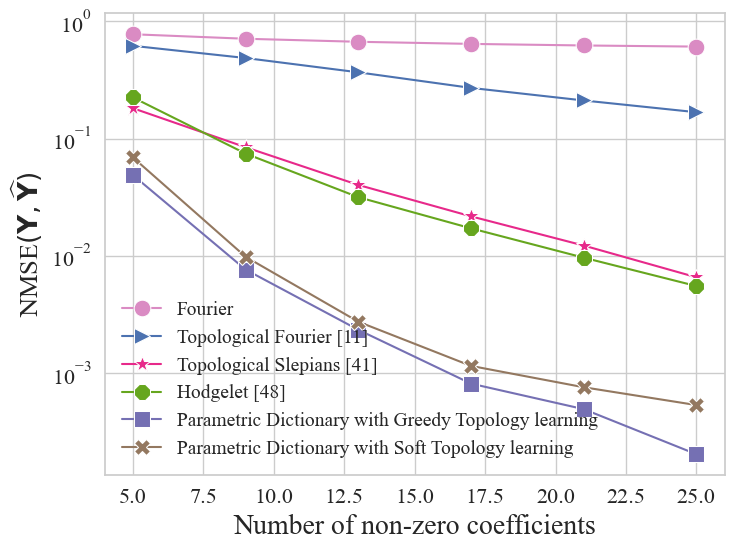

In [ ]:
# sns.set(font_scale=1)
dict_types_real = {
    "classic_fourier": "Fourier",
    "fourier": "Topological Fourier [11]",
    "slepians": "Topological Slepians [41]",
    "wavelet": "Hodgelet [48]",
    # "separated": "Parametric Dictionary (Separated Hodge Laplacian)",
    "complete": "Parametric Dictionary with Greedy Topology learning",
    "complete_soft": "Parametric Dictionary with Soft Topology learning",
}

res_df_real = pd.DataFrame()
for typ in dict_types_real.keys():
    if typ == "complete_soft":
        tmp_df = pd.DataFrame(dict_errors3[typ])
    else:
        tmp_df = pd.DataFrame(dict_errors3[typ][0])
    tmp_df = tmp_df.transpose()
    tmp_df.columns = K0_coll
    tmp_df = tmp_df.melt(var_name="Sparsity", value_name="Error")
    tmp_df["Method"] = dict_types_real[typ]
    # print(typ)
    # print(tmp_df)
    res_df_real = pd.concat([res_df_real, tmp_df]).reset_index(drop=True)

# print(res_df_real)

markers = (
 ["o", ">", "*", "8", "s", "X"]
)
colors1 = sns.color_palette()[: len(list(dict_errors3.keys())) - 1]
colors2 = sns.color_palette("Dark2", 5)
colors1[1] = colors2[-2]
colors1[2] = colors2[-1]
colors1 = [colors1[-1]] + colors1[:-1]
colors1[4] = colors2[-3]
colors1[5] = sns.color_palette()[5]

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.rcParams['xtick.labelsize'] = 16 
plt.rcParams['ytick.labelsize'] = 16  
plt.rcParams["font.size"] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams["font.family"] = "Times New Roman"
my_plt = sns.lineplot(
    data=res_df_real,
    x="Sparsity",
    y="Error",
    hue="Method",
    palette=colors1,
    markers=markers,
    markersize=12,
    dashes=False,
    style="Method",
)
my_plt.set(yscale="log")
my_plt.set_ylabel(r"NMSE$(\mathbf{Y},\widehat{\mathbf{Y}})$", fontsize=19)
my_plt.set_xlabel(f"Number of non-zero coefficients", fontsize=20)
handles, labels = my_plt.get_legend_handles_labels()
my_plt.legend(handles=handles[0:], labels=labels[0:])
plt.legend(
    fontsize=14,
    frameon=False,              # Display a frame around the legend
    framealpha=0.3 
)
# plt.savefig("SignalErrorReal.pdf", format="pdf")
plt.show()

In [30]:
res_df_real

,Sparsity,Error,Method
0,5,0.775298,Fourier
1,9,0.709713,Fourier
2,13,0.668750,Fourier
3,17,0.641626,Fourier
4,21,0.622078,Fourier
5,25,0.608526,Fourier
6,5,0.617917,Topological Fourier [11]
7,9,0.486389,Topological Fourier [11]
8,13,0.367373,Topological Fourier [11]
9,17,0.270621,Topological Fourier [11]
